This notebook is used to fetch historical data from poloniex and bitshares, the two exchanges that I primarily use for trading cryptocurrencies.

- [Poloniex](#Poloniex)
- [Bitshares](#Bitshares)

In [62]:
import os
import json
import time
import requests
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from bitshares import BitShares
from bitshares.account import Account
from bitshares.market import Market
from bitshares.asset import Asset 
from bitshares.block import Block
from bitshares.price import Price
from bitshares.amount import Amount

# Poloniex

In [3]:
def poloniex_api(command, args={}):
    url = 'https://poloniex.com/public?command='+command
    for arg, value in args.items():
        url += '&{}={}'.format(arg,value)
    return json.loads(requests.get(url).content.decode('utf-8'))

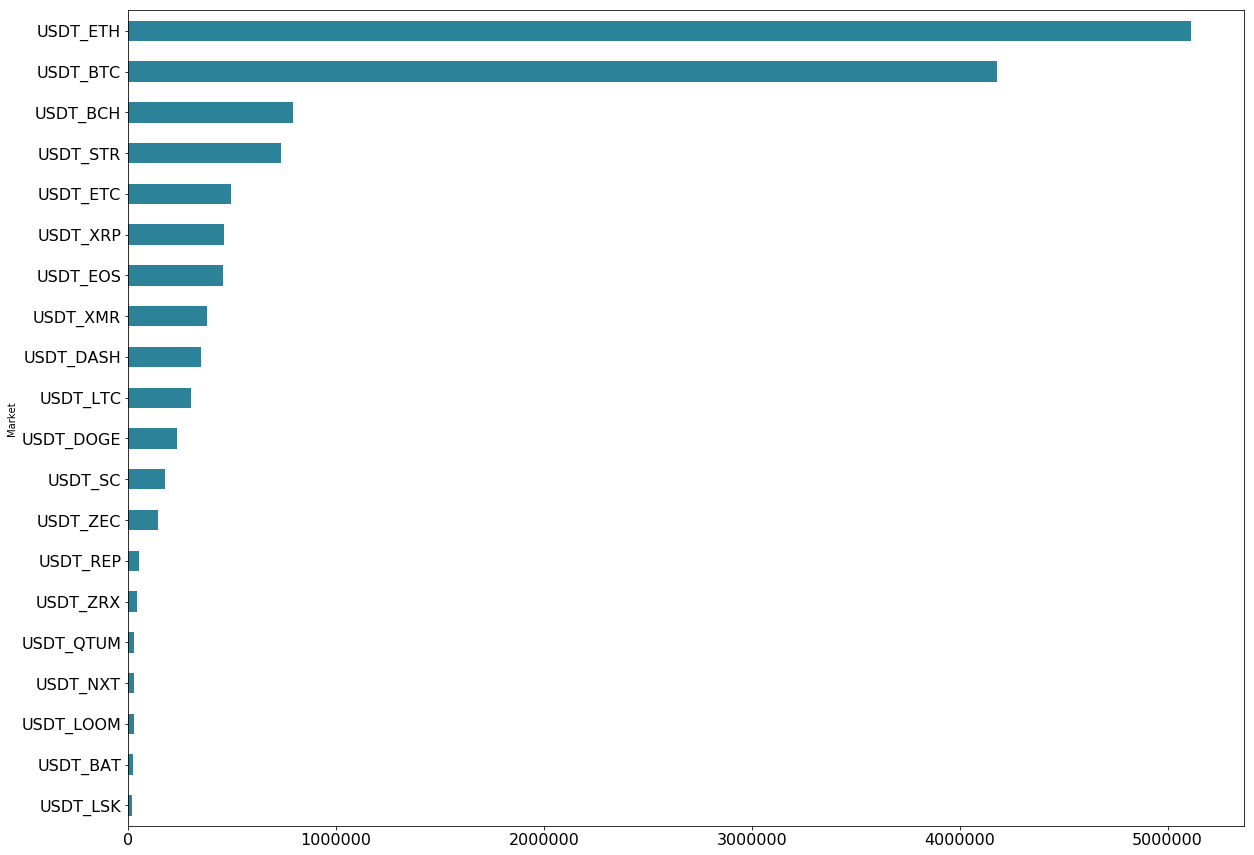

In [7]:
market_volumes = poloniex_api('return24hVolume')
btc_market_volumes = [(m, float(market_volumes[m]['USDT'])) for m in market_volumes if m[:3] == 'USD']
top_markets = (pd.DataFrame(btc_market_volumes, columns=['Market','Volume'])
     .set_index('Market').sort_values(by='Volume', ascending=False).head(20))

top_markets.Volume.sort_values(0).plot(kind='barh', figsize=(20,15), fontsize=16, color='#2C8399')

In [60]:
pd.DataFrame(btc_market_volumes).head()

,0,1
0,USDT_BTC,4.178954e+06
1,USDT_DASH,3.505788e+05
2,USDT_LTC,3.043153e+05
3,USDT_NXT,2.632248e+04
4,USDT_STR,7.341274e+05


In [5]:
market_volumes

{'BTC_BCN': {'BTC': '88.71863117', 'BCN': '301302237.62443396'},
 'BTC_BTCD': {'BTC': '1.69414832', 'BTCD': '186.89895604'},
 'BTC_BTM': {'BTC': '1.33051589', 'BTM': '65606.47214125'},
 'BTC_BTS': {'BTC': '18.72122852', 'BTS': '1223259.40341362'},
 'BTC_BURST': {'BTC': '2.87917575', 'BURST': '1788181.47684985'},
 'BTC_CLAM': {'BTC': '0.54667368', 'CLAM': '1470.76275222'},
 'BTC_DASH': {'BTC': '193.86400539', 'DASH': '6591.49499202'},
 'BTC_DGB': {'BTC': '49.11719179', 'DGB': '13569657.05792164'},
 'BTC_DOGE': {'BTC': '512.58744772', 'DOGE': '510661677.02555561'},
 'BTC_EMC2': {'BTC': '1.89935049', 'EMC2': '203022.25220130'},
 'BTC_GAME': {'BTC': '3.27490464', 'GAME': '119693.43429264'},
 'BTC_GRC': {'BTC': '0.50844245', 'GRC': '177234.06107246'},
 'BTC_HUC': {'BTC': '0.06711436', 'HUC': '9891.68754122'},
 'BTC_LTC': {'BTC': '101.82158565', 'LTC': '12284.43209981'},
 'BTC_MAID': {'BTC': '16.56759484', 'MAID': '453138.92451389'},
 'BTC_OMNI': {'BTC': '1.88360907', 'OMNI': '1432.77941620'

In [54]:
start = datetime(2010,1,1)
end = datetime.now()#(2017,1,2)
trades = pd.DataFrame(
            poloniex_api('returnChartData', {
                'currencyPair': 'USDT_BTC',
                'start': unix_time(start),
                'end': unix_time(end),
                'period': 900
            }))

In [55]:
trades.index =  pd.to_datetime(trades.date*1e9)
trades.head(20)

,close,date,high,low,open,quoteVolume,volume,weightedAverage
date,,,,,,,,
2015-02-19 19:00:00,225.0,1424372400,225.0,225.0,225.0,0.004444,0.999999,225.000000
2015-02-19 19:15:00,225.0,1424373300,225.0,225.0,225.0,0.000000,0.000000,225.000000
2015-02-19 19:30:00,225.0,1424374200,225.0,225.0,225.0,0.000000,0.000000,225.000000
2015-02-19 19:45:00,225.0,1424375100,225.0,225.0,225.0,0.000000,0.000000,225.000000
2015-02-19 20:00:00,225.0,1424376000,225.0,225.0,225.0,0.000000,0.000000,225.000000
2015-02-19 20:15:00,240.0,1424376900,240.0,225.0,225.0,0.128625,30.624650,238.092076
2015-02-19 20:30:00,240.0,1424377800,240.0,240.0,240.0,0.000000,0.000000,240.000000
2015-02-19 20:45:00,244.0,1424378700,244.0,244.0,244.0,0.060046,14.651226,244.000000
2015-02-19 21:00:00,244.0,1424379600,244.0,244.0,244.0,0.000000,0.000000,244.000000


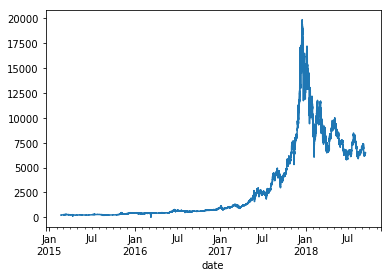

In [57]:
trades.weightedAverage.plot()

In [69]:
trades.shape

(4111, 4)

# Bitshares

In [63]:
bitshares_instance = BitShares(node='wss://dexnode.net/ws')

In [64]:
MARKET_QUOTE = 'CNY'
MARKET_BASE = 'USD'
market =  Market('{}:{}'.format(MARKET_QUOTE, MARKET_BASE), bitshares_instance=bitshares_instance)

In [70]:
end_time = datetime.now()
start_time = end_time - timedelta(days=30)

In [68]:
trades = pd.DataFrame()
need_to_fetch = lambda t: len(t) == 0 or len(t) % 100 == 0

while need_to_fetch(trades):

    new_trades = pd.DataFrame()
    
    for trade in market.trades(limit=100, start=start_time, stop=end_time):
        new_trades = new_trades.append({
            'base_amount': trade['base']['amount'],
            'quote_amount': trade['quote']['amount'],
            'time': trade['time'],
            'price': trade['price']
        }, ignore_index=True)
        
    if new_trades.empty:
        break
    
    trades = pd.concat([trades, new_trades]).sort_values('time')
    end_time = trades.time.min()

#trades.to_csv('BITUSD_BITCNY.csv')
print('Acquired {} total trades'.format(len(trades)))

Acquired 4111 total trades


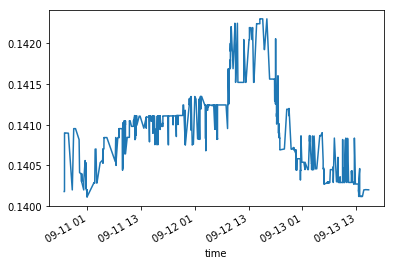

In [75]:
trades.set_index('time').price.plot()

Connection is already closed.


{'asks': [250.0001 CNY for 35.0500 USD @ 0.14019994 USD/CNY,
  250.0001 CNY for 35.0750 USD @ 0.14029994 USD/CNY,
  135.9969 CNY for 19.0828 USD @ 0.14031790 USD/CNY,
  250.0001 CNY for 35.1000 USD @ 0.14039994 USD/CNY,
  250.0001 CNY for 35.1250 USD @ 0.14049994 USD/CNY,
  250.0001 CNY for 35.1500 USD @ 0.14059994 USD/CNY,
  250.0001 CNY for 35.1750 USD @ 0.14069994 USD/CNY,
  4,772.2596 CNY for 671.9969 USD @ 0.14081315 USD/CNY,
  4,844.1833 CNY for 682.1247 USD @ 0.14081315 USD/CNY,
  4,500.0000 CNY for 633.6593 USD @ 0.14081318 USD/CNY,
  33.6028 CNY for 4.7318 USD @ 0.14081565 USD/CNY,
  71.0147 CNY for 10.0000 USD @ 0.14081592 USD/CNY,
  1,576.5215 CNY for 222.0000 USD @ 0.14081635 USD/CNY,
  41.2516 CNY for 5.8089 USD @ 0.14081636 USD/CNY,
  71.0141 CNY for 10.0000 USD @ 0.14081711 USD/CNY,
  71.0134 CNY for 10.0000 USD @ 0.14081830 USD/CNY,
  364.4297 CNY for 51.3200 USD @ 0.14082277 USD/CNY,
  1,718.3936 CNY for 242.0000 USD @ 0.14082920 USD/CNY,
  71.0007 CNY for 10.0000 USD 